In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal, norm, lognorm, bernoulli

import pymc3 as pm

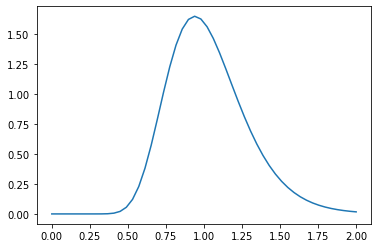

In [2]:
x = np.linspace(0, 2)
plt.plot(x, lognorm.pdf(x, loc=0, s=0.25))
plt.savefig('lognorm_prior.png', transparent=True)

In [3]:
np.round([lognorm.ppf(0.025, loc=0, s=0.25), lognorm.ppf(0.975, loc=0, s=0.25)], 2)

array([0.61, 1.63])

In [4]:
N = 100

h0 = norm.rvs(size=N, loc=10, scale=2)

treatment = np.array([0,1]*int(N/2))
fungus    = bernoulli.rvs(size=N, p=0.5-treatment*0.4)
h1        = h0 + norm.rvs(size=N, loc=5-3*fungus)

In [5]:
with pm.Model() as model:
    alpha  = pm.Lognormal('alpha', mu=10, sigma=100)
    beta_T = pm.Normal('beta_T', mu=0, sigma=0.5)
    beta_F = pm.Normal('beta_F', mu=0, sigma=0.5)
    sigma  = pm.Exponential('sigma', lam=1)
    p      = alpha + beta_T*treatment + beta_F*fungus
    mu     = h0*p
    h      = pm.Normal('height', mu=mu, sd=sigma, observed=h1)
    
    par_post = pm.find_MAP()
    hessian  = pm.find_hessian(par_post, vars=[alpha, beta_T, beta_F, sigma])

In [6]:
posterior_sample = multivariate_normal.rvs(size=10**4,
                        mean=np.array([par_post['alpha'], par_post['beta_T'], par_post['beta_F'], par_post['sigma']]),
                        cov=np.linalg.inv(hessian))

In [7]:
posterior_sample = pd.DataFrame(posterior_sample, columns=['alpha', 'beta_T', 'beta_F', 'sigma'])

In [8]:
posterior_sample.describe()

,alpha,beta_T,beta_F,sigma
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.441636,0.032233,-0.261684,1.345023
std,0.025129,0.029855,0.031385,0.095382
min,1.349653,-0.066907,-0.375239,0.982605
25%,1.424657,0.011981,-0.283080,1.280477
50%,1.442044,0.031917,-0.261599,1.346535
75%,1.458669,0.052137,-0.240490,1.410567
max,1.531870,0.145793,-0.147068,1.740017


In [9]:
with pm.Model() as model:
    alpha  = pm.Lognormal('alpha', mu=10, sigma=100)
    beta_T = pm.Normal('beta_T', mu=0, sigma=0.5)
    sigma  = pm.Exponential('sigma', lam=1)
    p      = alpha + beta_T*treatment
    mu     = h0*p
    h      = pm.Normal('height', mu=mu, sd=sigma, observed=h1)
    
    par_post = pm.find_MAP()
    hessian  = pm.find_hessian(par_post, vars=[alpha, beta_T, sigma])

In [10]:
posterior_sample = multivariate_normal.rvs(size=10**4,
                        mean=np.array([par_post['alpha'], par_post['beta_T'], par_post['sigma']]),
                        cov=np.linalg.inv(hessian))

In [11]:
posterior_sample = pd.DataFrame(posterior_sample, columns=['alpha', 'beta_T', 'sigma'])

In [12]:
posterior_sample.describe()

,alpha,beta_T,sigma
count,10000.000000,10000.000000,10000.000000
mean,1.293143,0.154444,1.746073
std,0.023059,0.033682,0.120464
min,1.210729,0.024747,1.291358
25%,1.277305,0.131493,1.664480
50%,1.293122,0.154550,1.745924
75%,1.308525,0.177359,1.827905
max,1.380343,0.295123,2.195012


### When fungus has nothing to do with the plant

In [14]:
N = 100

h0 = norm.rvs(size=N, loc=10, scale=2)

treatment = np.array([0,1]*int(N/2))
moist     = bernoulli.rvs(size=N, p=0.5)
fungus    = bernoulli.rvs(size=N, p=0.5 - 0.4*treatment + 0.4*moist)
h1        = h0 + norm.rvs(size=N, loc=5 + 3*moist)

In [15]:
with pm.Model() as model:
    alpha  = pm.Lognormal('alpha', mu=10, sigma=100)
    beta_T = pm.Normal('beta_T', mu=0, sigma=0.5)
    beta_F = pm.Normal('beta_F', mu=0, sigma=0.5)
    sigma  = pm.Exponential('sigma', lam=1)
    p      = alpha + beta_T*treatment + beta_F*fungus
    mu     = h0*p
    h      = pm.Normal('height', mu=mu, sd=sigma, observed=h1)
    
    par_post = pm.find_MAP()
    hessian  = pm.find_hessian(par_post, vars=[alpha, beta_T, beta_F, sigma])

In [16]:
posterior_sample = multivariate_normal.rvs(size=10**4,
                        mean=np.array([par_post['alpha'], par_post['beta_T'], par_post['beta_F'], par_post['sigma']]),
                        cov=np.linalg.inv(hessian))

In [17]:
posterior_sample = pd.DataFrame(posterior_sample, columns=['alpha', 'beta_T', 'beta_F', 'sigma'])

In [18]:
posterior_sample.describe()

,alpha,beta_T,beta_F,sigma
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.499963,0.079633,0.185108,2.137787
std,0.044259,0.044803,0.044553,0.148105
min,1.308631,-0.098348,0.012830,1.517567
25%,1.470304,0.048888,0.154950,2.036755
50%,1.500462,0.080183,0.185298,2.139039
75%,1.529731,0.110113,0.214688,2.237221
max,1.669987,0.226583,0.368744,2.680372


In [19]:
with pm.Model() as model:
    alpha  = pm.Lognormal('alpha', mu=10, sigma=100)
    beta_T = pm.Normal('beta_T', mu=0, sigma=0.5)
    sigma  = pm.Exponential('sigma', lam=1)
    p      = alpha + beta_T*treatment
    mu     = h0*p
    h      = pm.Normal('height', mu=mu, sd=sigma, observed=h1)
    
    par_post = pm.find_MAP()
    hessian  = pm.find_hessian(par_post, vars=[alpha, beta_T, sigma])

In [20]:
posterior_sample = multivariate_normal.rvs(size=10**4,
                        mean=np.array([par_post['alpha'], par_post['beta_T'], par_post['sigma']]),
                        cov=np.linalg.inv(hessian))

In [21]:
posterior_sample = pd.DataFrame(posterior_sample, columns=['alpha', 'beta_T', 'sigma'])

In [22]:
posterior_sample.describe()

,alpha,beta_T,sigma
count,10000.000000,10000.000000,10000.000000
mean,1.633909,0.012434,2.310591
std,0.031975,0.044555,0.160004
min,1.510244,-0.164354,1.718527
25%,1.611567,-0.018344,2.200645
50%,1.633735,0.012551,2.310235
75%,1.655719,0.043211,2.419777
max,1.746898,0.176757,3.016134
